In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Activation, Dropout, Conv1D, MaxPooling1D
from keras.preprocessing import sequence
from keras.utils import np_utils
from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import hgtk as hg 
#https://github.com/bluedisk/hangul-toolkit/
import konlpy as kn
from konlpy.tag import Kkma
kor_tagger = Kkma()

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pyprind
import os

Using TensorFlow backend.
C:\Users\lmgtt\Anaconda3\envs\tensorflow\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [2]:
sulliComments = pd.read_csv('sulliComments_nouns.csv',encoding='cp949')

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_data = sulliComments['comment']
y_data = sulliComments['bad']


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) #5572개의 행을 가진 X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) #단어를 숫자값, 인덱스로 변환하여 저장

print(sequences[:5])

[[555, 22, 14, 1, 15, 16], [894, 160, 11, 2, 12], [1, 21, 10, 329, 2, 32], [47, 2, 238], [23, 19]]


In [4]:
X_data = sulliComments['comment']
y_data = sulliComments['bad']
print('댓글의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

댓글의 개수: 1200
레이블의 개수: 1200


In [5]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'관': 1, 'ㅈㄲㅈ': 2, '리': 3, '악': 4, '플': 5, '거': 6, '설': 7, '악플': 8, '사람': 9, '종': 10, 'ㅈ': 11, 'ㄲ': 12, '설리': 13, '라': 14, '관종년': 15, '종년': 16, '정신병자': 17, '악플러': 18, '명복': 19, '러': 20, '관종': 21, '나': 22, '고인': 23, '연예인': 24, '노력': 25, '생각': 26, '때': 27, '젖꼭지': 28, '뭐': 29, '말': 30, '걸레': 31, '듯': 32, '금붕어': 33, '노브': 34, '댓': 35, '글': 36, '애': 37, '수': 38, '자살': 39, '관심': 40, '개': 41, '안': 42, '사랑': 43, '너': 44, '개구리': 45, '일': 46, '병신': 47, '나이': 48, '얼굴': 49, '기사': 50, '여자': 51, '남': 52, '퇴물': 53, '행복': 54, '해': 55, '노출': 56, '니': 57, '노브라': 58, '년': 59, '길': 60, '정신': 61, '짓': 62, '얘': 63, '댓글': 64, '지': 65, '마약': 66, '야': 67, '줄': 68, '무엇': 69, '여': 70, '터': 71, '니들': 72, '때문': 73, '내': 74, '마음': 75, '곳': 76, '진리': 77, '본인': 78, '악플러들': 79, '연기': 80, '자기': 81, '세상': 82, '오보': 83, '우리': 84, '스타': 85, '아이': 86, '이것': 87, '거지': 88, '선택': 89, 'ㅠ': 90, '데': 91, '종이': 92, '배우': 93, '실명제': 94, '인': 95, '인생': 96, '속': 97, '발': 98, '우울증': 99, '당': 100, '누': 101, '사실': 102, '하나': 103, '새끼':

In [6]:
vocab_size = len(word_to_index)+1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 2573


In [7]:
n_of_train = int(1200 * 0.8)
n_of_test = int(1200 - n_of_train)
print(n_of_train)
print(n_of_test)

960
240


단어의 최대 길이 : 58
단어의 평균 길이 : 7.524167


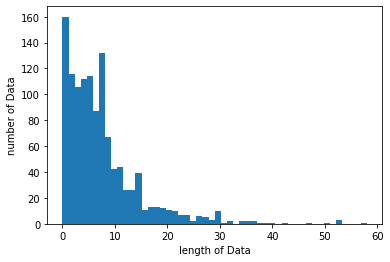

In [10]:
X_data=sequences
print('단어의 최대 길이 : %d' % max(len(l) for l in X_data))
print('단어의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [11]:
max_len = 58
# 전체 데이터셋의 길이는 58로 맞춥니다.
data = pad_sequences(X_data, maxlen=max_len)
print("data shape: ", data.shape)

data shape:  (1200, 58)


In [12]:
#X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.2)
X_test = data[n_of_train:] 
y_test = np.array(y_data[n_of_train:]) 
X_train = data[:n_of_train]
y_train = np.array(y_data[:n_of_train])


In [13]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.layers import Flatten, Dense, LSTM, Embedding, Activation, Dropout, Conv1D, MaxPooling1D

from tensorflow.keras.models import Sequential

In [15]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=60, validation_split=0.2)

Train on 768 samples, validate on 192 samples
Epoch 1/100
768/768 [==============================] - 1s 1ms/sample - loss: 0.6773 - acc: 0.5859 - val_loss: 0.6578 - val_acc: 0.7344
Epoch 2/100
768/768 [==============================] - 0s 287us/sample - loss: 0.5831 - acc: 0.8581 - val_loss: 0.6104 - val_acc: 0.7396
Epoch 3/100
768/768 [==============================] - 0s 276us/sample - loss: 0.4621 - acc: 0.9167 - val_loss: 0.5396 - val_acc: 0.7604
Epoch 4/100
768/768 [==============================] - 0s 281us/sample - loss: 0.3575 - acc: 0.9023 - val_loss: 0.4787 - val_acc: 0.8281
Epoch 5/100
768/768 [==============================] - 0s 307us/sample - loss: 0.2800 - acc: 0.9102 - val_loss: 0.4470 - val_acc: 0.8229
Epoch 6/100
768/768 [==============================] - 0s 302us/sample - loss: 0.2204 - acc: 0.9453 - val_loss: 0.4335 - val_acc: 0.8438
Epoch 7/100
768/768 [==============================] - 0s 250us/sample - loss: 0.1758 - acc: 0.9609 - val_loss: 0.4482 - val_acc: 0.77

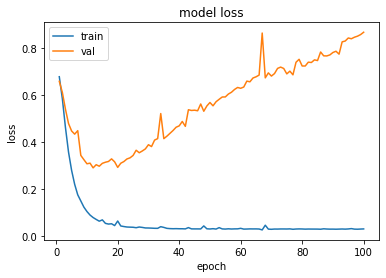

In [16]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

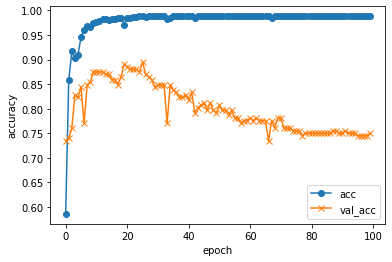

In [17]:
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")

In [18]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

240/240 [==============================] - 0s 183us/sample - loss: 1.0689 - acc: 0.7417

 테스트 정확도: 0.7417


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

predict_classes = model.predict_classes(X_test)
#2d to 1d
import itertools
def from_iterable(iterables):
    # chain.from_iterable(['ABC', 'DEF']) --> ['A', 'B', 'C', 'D', 'E', 'F']
    for it in iterables:
        for element in it:
            yield element
y_pred = np.array(list(itertools.chain.from_iterable(predict_classes)))
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,87,28,115
1,34,91,125
All,121,119,240


In [20]:
#confusion_matrix(y_test,y_pred)
print("accuracy score : ", accuracy_score(y_test,y_pred))
print("precision score : ", precision_score(y_test,y_pred))
print("recall score : ", recall_score(y_test,y_pred))
print("f1 score : ", f1_score(y_test,y_pred))

accuracy score :  0.7416666666666667
precision score :  0.7647058823529411
recall score :  0.728
f1 score :  0.7459016393442623
